In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

daegu_final = pd.read_csv('./output/daegu_final.csv')

daegu_final

,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI
0,2010,6,1,0,2010-06-01 00:00:00,16.5,0.0,-1,53.0,NaN,NaN,1,동인동,15.589444,60.74355
1,2010,6,1,1,2010-06-01 01:00:00,18.1,0.0,-1,49.0,NaN,NaN,1,동인동,17.245000,62.73431
2,2010,6,1,2,2010-06-01 02:00:00,19.7,0.0,-1,46.0,NaN,NaN,1,동인동,18.926667,64.65038
3,2010,6,1,3,2010-06-01 03:00:00,20.8,0.0,-1,41.0,NaN,NaN,1,동인동,20.006111,65.72772
4,2010,6,1,4,2010-06-01 04:00:00,22.2,0.0,-1,36.0,NaN,NaN,2,동인동,21.415556,67.04608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,2022,4,30,19,2022-04-30 19:00:00,10.7,0.0,-1,71.0,2.1,335.0,-1,구지면,9.679444,52.33503
14831612,2022,4,30,20,2022-04-30 20:00:00,11.0,0.0,-1,65.0,2.2,339.0,-1,구지면,9.852778,52.99350
14831613,2022,4,30,21,2022-04-30 21:00:00,11.9,0.0,-1,61.0,2.2,338.0,-1,구지면,10.738333,54.40241
14831614,2022,4,30,22,2022-04-30 22:00:00,13.4,0.0,-1,53.0,2.0,351.0,-1,구지면,12.179444,56.60598


In [20]:
daegu_final.columns

Index(['year', 'month', 'day', 'hour', 'datetime', 'temp', 'rainfall',
       'lightning', 'humidity', 'wind_speed', 'wind_direction', 'condition',
       'region', 'HI', 'DI'],
      dtype='object')

In [21]:
# column 순서 변경
daegu_final = daegu_final[['year', 'month', 'day', 'hour', 'datetime', 'temp', 'rainfall',
       'lightning', 'humidity', 'wind_speed', 'wind_direction', 'condition',
       'region', 'DI', 'HI']]

In [22]:
# 목표 변수 'HI'를 target에 저장
data = daegu_final.iloc[:, :-1]
target = daegu_final['HI']

# 데이터셋 크기
print(data.shape)
print(target.shape)

(14831616, 14)
(14831616,)


In [23]:
# 데이터프레임 결합
df = pd.concat([data, target], axis=1)
df.head(2)

,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,DI,HI
0,2010,6,1,0,2010-06-01 00:00:00,16.5,0.0,-1,53.0,NaN,NaN,1,동인동,60.74355,15.589444
1,2010,6,1,1,2010-06-01 01:00:00,18.1,0.0,-1,49.0,NaN,NaN,1,동인동,62.73431,17.245000


In [24]:
# 데이터프레임의 기본 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14831616 entries, 0 to 14831615
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   year            int64  
 1   month           int64  
 2   day             int64  
 3   hour            int64  
 4   datetime        object 
 5   temp            float64
 6   rainfall        float64
 7   lightning       int64  
 8   humidity        float64
 9   wind_speed      float64
 10  wind_direction  float64
 11  condition       int64  
 12  region          object 
 13  DI              float64
 14  HI              float64
dtypes: float64(7), int64(6), object(2)
memory usage: 1.7+ GB


In [27]:
# 결측값 확인
df.isnull().sum()

year              0
month             0
day               0
hour              0
datetime          0
temp              0
rainfall          0
lightning         0
humidity          0
wind_speed        0
wind_direction    0
condition         0
region            0
DI                0
HI                0
dtype: int64

In [29]:
# 결측치 처리
df.drop(['lightning','condition'], axis=1, inplace=True)
df.dropna(inplace=True)

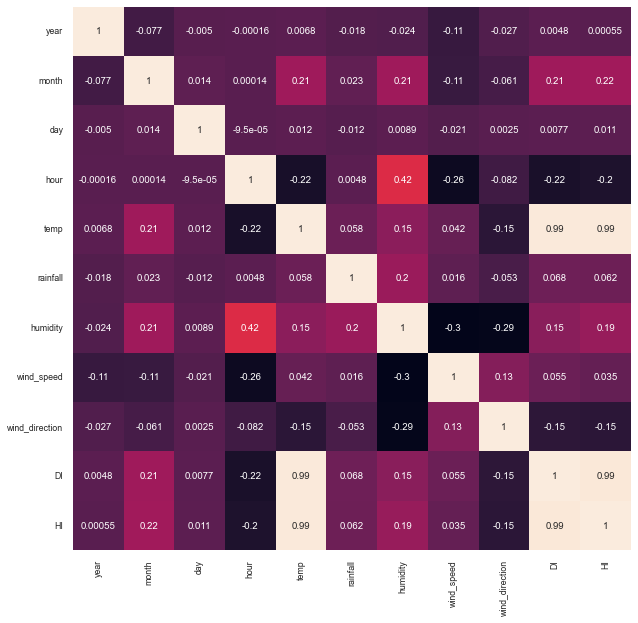

In [31]:
# 상관 관계 행렬
df_corr = df.corr()

# 히트맵 그리기
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [34]:
# 변수 간의 상관 관계 분석 - Target 변수와 상관 관계가 높은 순서대로 정리
corr_order = df_corr.loc[:'DI','HI'].abs().sort_values(ascending=False)

corr_order

temp              0.993535
DI                0.988315
month             0.217923
hour              0.197070
humidity          0.190805
wind_direction    0.154148
rainfall          0.061963
wind_speed        0.035458
day               0.010980
year              0.000551
Name: HI, dtype: float64

In [35]:
# 시각화로 분석할 피처 선택 추출 - Target 변수와 상관 관계가 높은 4개 변수
plot_cols = ['HI','temp','DI','month','hour']
plot_df = df.loc[:, plot_cols]

plot_df.head()

,HI,temp,DI,month,hour
4519,9.651111,11.6,54.79488,12,7
4520,8.629444,10.6,53.55390,12,8
4521,6.880556,9.2,52.35016,12,9
4522,5.633333,7.9,50.49614,12,10
4523,3.474444,5.7,47.10792,12,11


KeyboardInterrupt: 

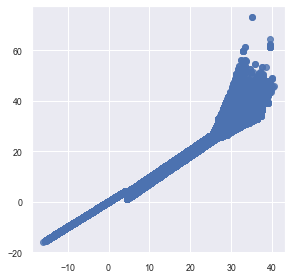

In [36]:
# regplot으로 선형회귀선 표시
plt.figure(figsize=(10,10))

for idx, col in enumerate(plot_cols[1:]):
    ax1 = plt.subplot(2,2, idx+1)
    sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=ax1)

plt.show()

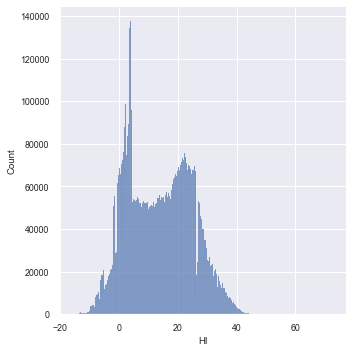

In [37]:
# Target 데이터 분포

sns.displot(x='HI', kind='hist', data=df)
plt.show()

In [38]:
# 사이킷런 MinMaxScalar 적용

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df_scaled = df.iloc[:, :-1]
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)

# 스케일링 변환된 값을 데이터프레임에 반영
df.iloc[:, :-1] = df_scaled[:, :]
df.head()

ValueError: could not convert string to float: '2010-12-06 07:00:00'

In [39]:
# 학습 - 테스트 데이터셋 분할
from sklearn.model_selection import train_test_split
X_data = df.loc[:, ['temp','DI']]
y_data = df.loc[:, 'HI']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=12)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(11351934, 2) (11351934,)
(2837984, 2) (2837984,)


In [40]:
# 선형 회귀 모형
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print("회귀계수(기울기):", np.round(lr.coef_, 1))
print("상수항(절편):", np.round(lr.intercept_, 1))

회귀계수(기울기): [1. 0.]
상수항(절편): -2.3


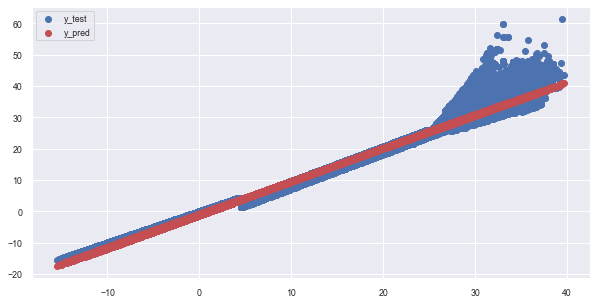

In [41]:
# 예측
y_test_pred = lr.predict(X_test)

# 예측값, 실제값의 분포
plt.figure(figsize=(10,5))
plt.scatter(X_test['temp'], y_test, label='y_test')
plt.scatter(X_test['temp'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')

plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:1.5151
Test MSE:1.5134


In [43]:
# cross_val_score 함수
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse_scores = -1*cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("개별 Fold의 MSE:", np.round(mse_scores, 4))
print("평균 MSE:%.4f" % np.mean(mse_scores))

개별 Fold의 MSE: [1.5507 1.5524 1.55   1.5537 1.5085]
평균 MSE:1.5431


In [64]:
# 2차 다항식 변환
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
print("원본 학습 데이터셋:", X_train.shape)
print("2차 다항식 변환 데이터셋:", X_train_poly.shape)


원본 학습 데이터셋: (404, 2)
2차 다항식 변환 데이터셋: (404, 6)


In [65]:
# 2차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f"% train_mse)

X_test_poly = pf.fit_transform(X_test)
y_test_pred = lr.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f"% test_mse)

Train MSE:21.5463
Test MSE:16.7954


In [66]:
# 15차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
pf = PolynomialFeatures(degree = 15)
X_train_poly = pf.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f"% train_mse)

X_test_poly = pf.fit_transform(X_test)
y_test_pred = lr.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f"% test_mse)

Train MSE:11.1433
Test MSE:85358259728955.1719


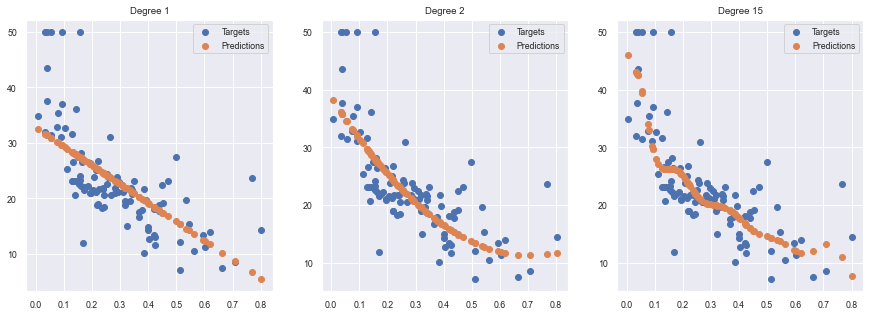

In [67]:
# 다항식 차수에 따른 모델 적합도 변화
plt.figure(figsize=(15,5))
for n, deg in enumerate([1, 2, 15]):
    ax1 = plt.subplot(1, 3, n+1)
    # plt.axis('off')
    # degree별 다항 회귀 모형 적용
    pf = PolynomialFeatures(degree=deg)
    X_train_poly = pf.fit_transform(X_train.loc[:, ['LSTAT']])
    X_test_poly = pf.fit_transform(X_test.loc[:, ['LSTAT']])
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)
    y_test_pred = lr.predict(X_test_poly)

    # 실제값 분포
    plt.scatter(X_test.loc[:,['LSTAT']], y_test, label='Targets')

    # 예측값 분포
    plt.scatter(X_test.loc[:,['LSTAT']], y_test_pred, label='Predictions')

    # 제목 표시
    plt.title("Degree %d" % deg)

    # 범례 표시
    plt.legend()

plt.show()

In [75]:
# Ridge(L2 규제)
from sklearn.linear_model import Ridge

rdg = Ridge(alpha=2.5)
rdg.fit(X_train_poly, y_train)

y_train_pred = rdg.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = rdg.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:35.9484
Test MSE:42.0011


In [76]:
# Lasso(L1 규제)
from sklearn.linear_model import Lasso

las = Lasso(alpha=0.05)
las.fit(X_train_poly, y_train)

y_train_pred = las.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = las.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:32.3204
Test MSE:37.7103


In [79]:
# ElasticNet(L2/L1 규제)
from sklearn.linear_model import ElasticNet

ela = ElasticNet(alpha=0.01, l1_ratio=0.7)
ela.fit(X_train_poly, y_train)

y_train_pred = ela.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = ela.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:33.7551
Test MSE:39.4968


In [80]:
# 의사결정나무
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=3, random_state=12)
dtr.fit(X_train, y_train)

y_train_pred = dtr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = dtr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:18.8029
Test MSE:17.9065


In [81]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=3, random_state=12)
rfr.fit(X_train, y_train)

y_train_pred = rfr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = rfr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:16.0201
Test MSE:17.7751


In [84]:
# XGboost
from xgboost import XGBRegressor

xgbr = XGBRegressor(objective='reg:squarederror', max_depth=3, random_state=12)
xgbr.fit(X_train, y_train)

y_train_pred = xgbr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = xgbr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:3.5176
Test MSE:20.2060
